# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')

column_list = df['plans_universitypast_failures'].to_list()
col1 = [1 if el > 0 else -1 for el in column_list]
col2 = [abs(el) % 10 for el in column_list]
df['plans_university'] = col1
df['past_failures'] = col2
del df['plans_universitypast_failures']

cnt = df['traveltime'].count()
s = df['traveltime'].sum()
df['traveltime'] = [df['traveltime'][i] if (df['traveltime'][i] <= 4 and df['traveltime'][i] >= 1) 
                    else s // cnt for i in range(len(df['traveltime']))]

df.head(10)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0
5,17,2,4,1,2,4,3,2.0,1.0,1.0,5,0,1,1,1,1,1,0
6,15,1,1,3,2,4,2,1.0,1.0,2.0,2,0,0,0,1,1,1,0
7,15,3,3,1,4,4,3,3.0,1.0,1.0,4,0,1,0,0,1,1,0
8,19,1,1,3,1,4,4,4.0,3.0,3.0,5,1,0,0,1,1,1,1
9,17,1,1,1,3,4,3,2.0,1.0,2.0,4,0,1,1,1,1,1,0


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [2]:
for name in df.columns:
    cnt = df[name].count()
    s = df[name].sum()
    df[name] = [df[name][i] if not df.isnull()[name][i] else s // cnt for i in range(len(df[name]))]

print(df.isnull().any())

df.head(10)

age                 False
Medu                False
Fedu                False
traveltime          False
studytime           False
famrel              False
freetime            False
goout               False
Dalc                False
Walc                False
health              False
sex_M               False
address_U           False
famsize_LE3         False
Pstatus_T           False
nursery             False
plans_university    False
past_failures       False
dtype: bool


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0
5,17,2,4,1,2,4,3,2.0,1.0,1.0,5,0,1,1,1,1,1,0
6,15,1,1,3,2,4,2,1.0,1.0,2.0,2,0,0,0,1,1,1,0
7,15,3,3,1,4,4,3,3.0,1.0,1.0,4,0,1,0,0,1,1,0
8,19,1,1,3,1,4,4,4.0,3.0,3.0,5,1,0,0,1,1,1,1
9,17,1,1,1,3,4,3,2.0,1.0,2.0,4,0,1,1,1,1,1,0


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [3]:
age0 = [el for el in df['age']]
for name in df.columns:
    if name == 'plans_university':
        df[name] = [0 if el == -1 else 1 for el in df[name]]
    else:
        df[name] = df[name] / max(df[name])

df.head(10)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,0.008036,1.00,1.00,0.25,0.50,1.0,0.8,0.8,0.2,0.4,1.0,1.0,1.0,0.0,1.0,1.0,1,0.000000
1,0.008538,1.00,1.00,0.25,0.25,1.0,0.6,0.8,0.2,0.4,1.0,0.0,1.0,0.0,1.0,1.0,1,0.000000
2,0.008036,0.25,0.25,0.50,0.25,0.8,1.0,1.0,0.4,0.8,1.0,1.0,0.0,1.0,1.0,1.0,1,0.000000
3,0.009041,0.25,0.50,0.50,0.25,0.6,0.8,0.8,0.4,0.8,0.8,1.0,1.0,0.0,1.0,0.0,0,0.000000
4,0.008538,0.50,0.25,0.50,0.50,0.8,0.4,1.0,0.2,0.4,1.0,0.0,0.0,0.0,1.0,1.0,1,0.000000
5,0.008538,0.50,1.00,0.25,0.50,0.8,0.6,0.4,0.2,0.2,1.0,0.0,1.0,1.0,1.0,1.0,1,0.000000
6,0.007534,0.25,0.25,0.75,0.50,0.8,0.4,0.2,0.2,0.4,0.4,0.0,0.0,0.0,1.0,1.0,1,0.000000
7,0.007534,0.75,0.75,0.25,1.00,0.8,0.6,0.6,0.2,0.2,0.8,0.0,1.0,0.0,0.0,1.0,1,0.000000
8,0.009543,0.25,0.25,0.75,0.25,0.8,0.8,0.8,0.6,0.6,1.0,1.0,0.0,0.0,1.0,1.0,1,0.333333
9,0.008538,0.25,0.25,0.25,0.75,0.8,0.6,0.4,0.2,0.4,0.8,0.0,1.0,1.0,1.0,1.0,1,0.000000


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from math import sqrt

scores = pd.read_csv('scores.csv')

scores1 = scores.to_numpy()
df1 = df.to_numpy()

kf = KFold(n_splits=4)
for train, test in kf.split(scores):
    X_train = df1[train]
    X_test = df1[test]
    y_train = scores1[train]
    y_test = scores1[test]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = 0
    for i in range(len(y_test)):
        rmse += (y_test[i] - y_pred[i]) * (y_test[i] - y_pred[i])
    rmse = sqrt(rmse / len(y_test))
    
    print(f"Точность модели: ", rmse)

Точность модели:  13.091190531404587
Точность модели:  15.669835617900823
Точность модели:  15.598527566929334
Точность модели:  15.236430286160894


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [5]:
from numpy import loadtxt

attendance = pd.read_csv('attendance.csv', sep = ';')
df['attendance'] = 1 - (attendance.isnull().sum (axis= 1) / attendance.shape[1])
support = loadtxt('school_support.txt')
col = [0] * df.shape[0]
for el in support:
    col[int(el)] = 1
df['school_sup'] = col

scores1 = scores.to_numpy()
df1 = df.to_numpy()

kf = KFold(n_splits=4)
for train, test in kf.split(scores):
    X_train = df1[train]
    X_test = df1[test]
    y_train = scores1[train]
    y_test = scores1[test]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = 0
    for i in range(len(y_test)):
        rmse += (y_test[i] - y_pred[i]) * (y_test[i] - y_pred[i])
    rmse = sqrt(rmse / len(y_test))
    
    print(f"Точность модели: ", rmse)

Точность модели:  12.813425644431787
Точность модели:  15.459466530412776
Точность модели:  15.893308300615407
Точность модели:  15.24030283231657


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

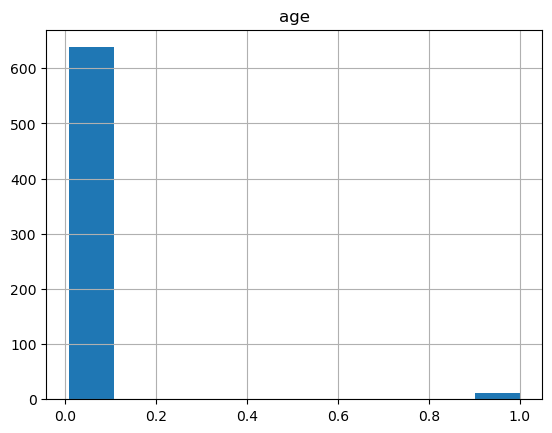

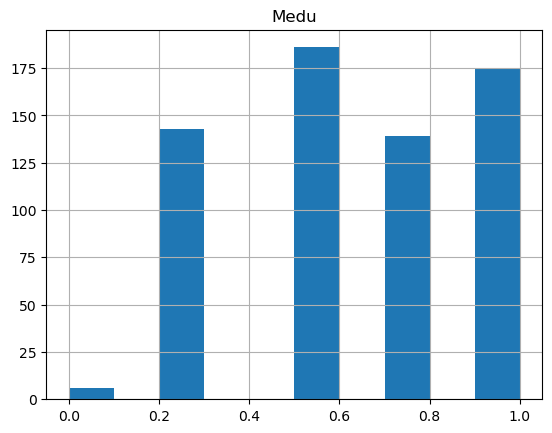

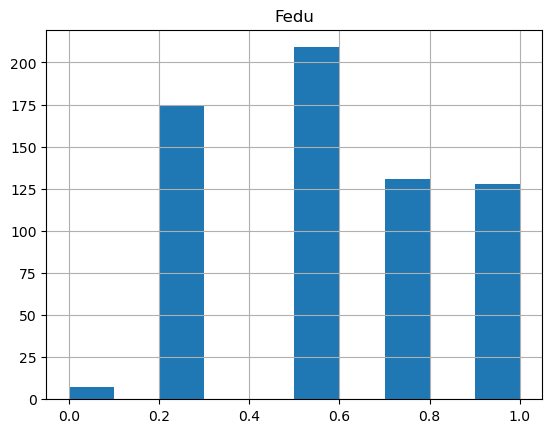

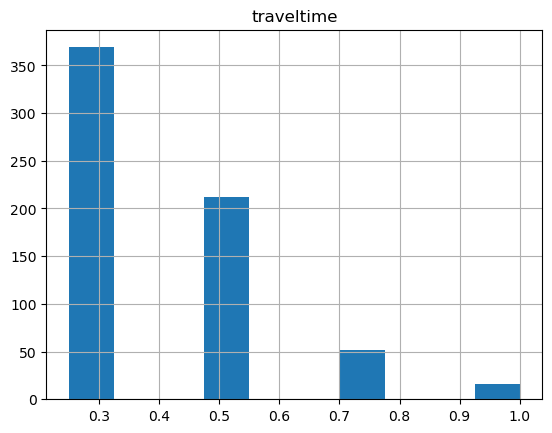

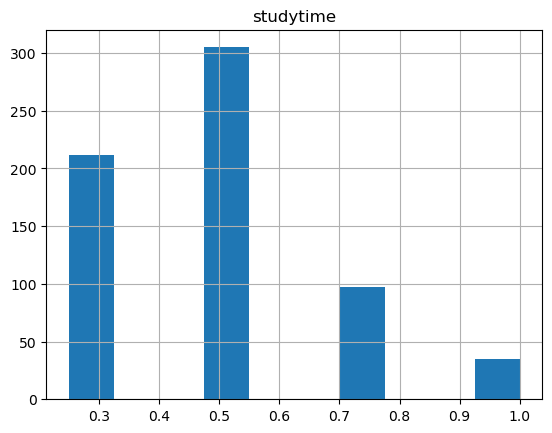

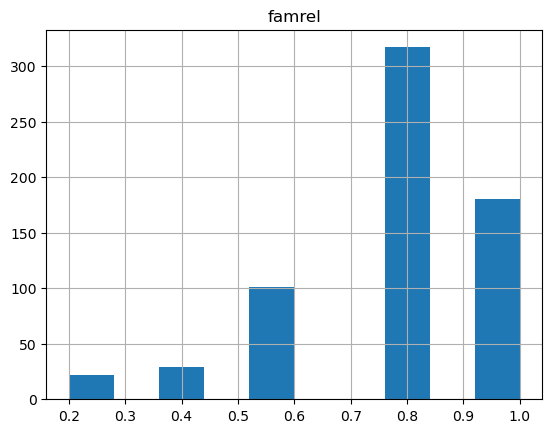

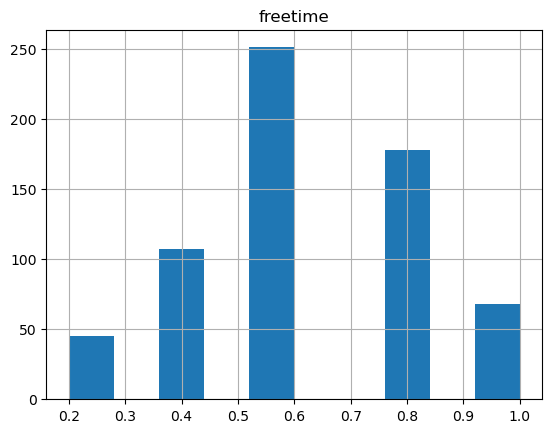

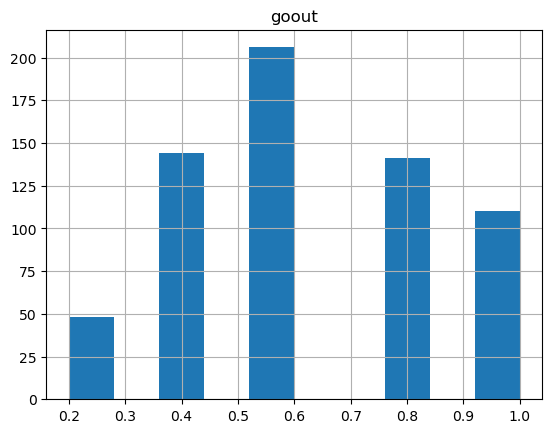

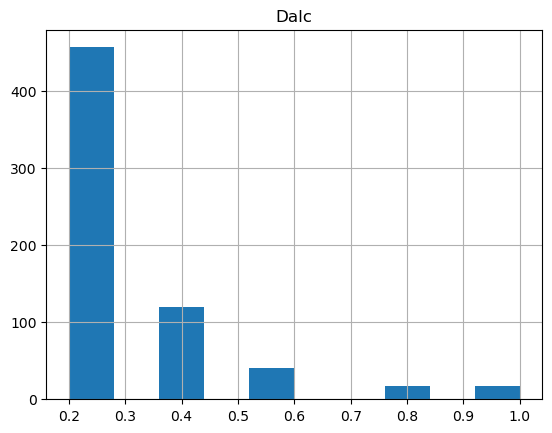

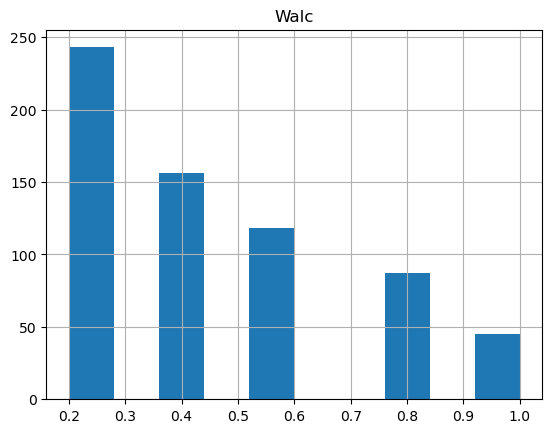

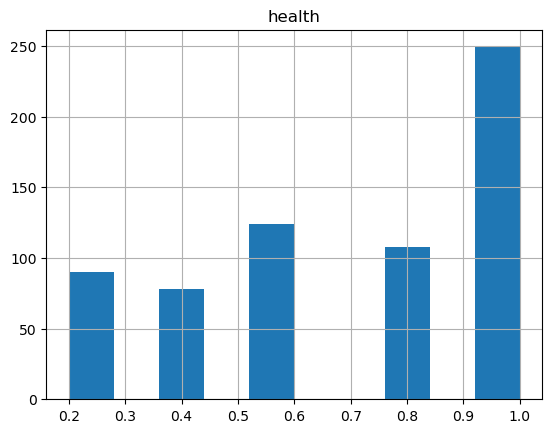

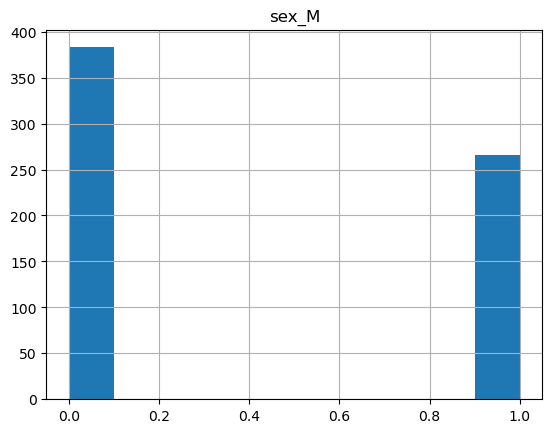

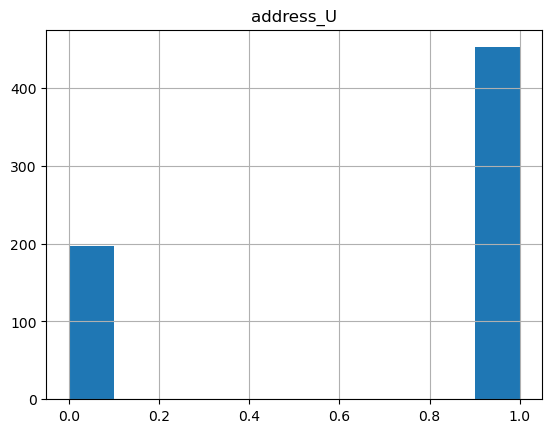

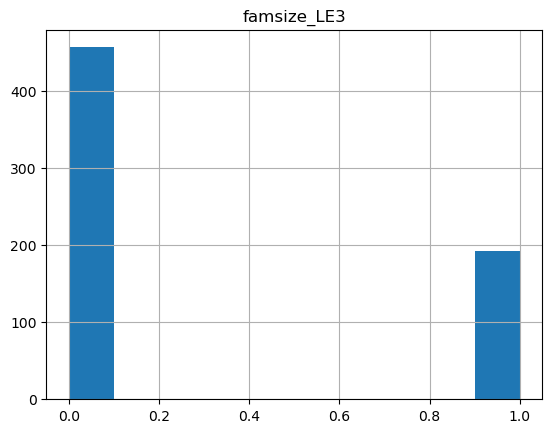

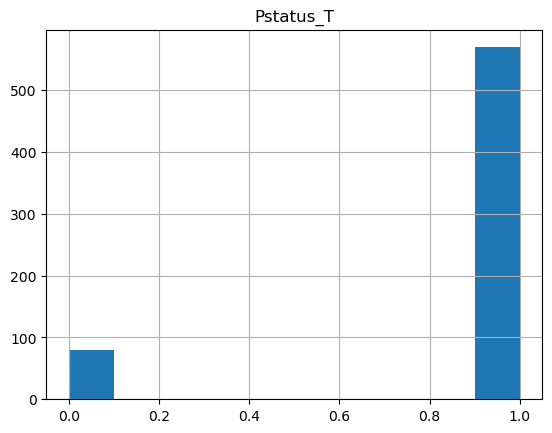

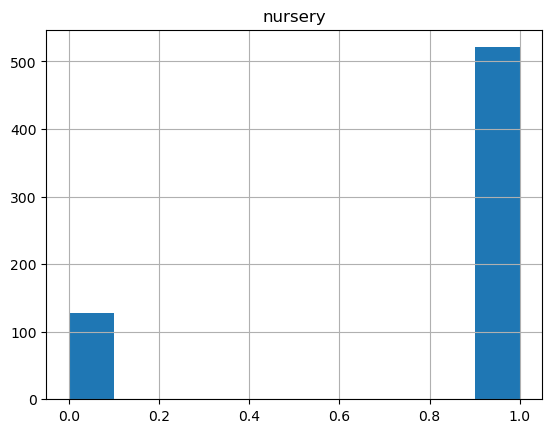

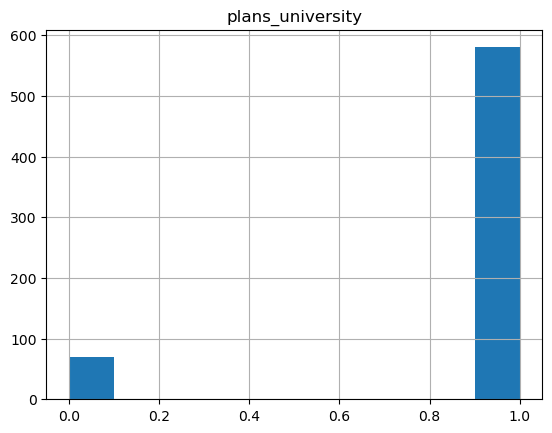

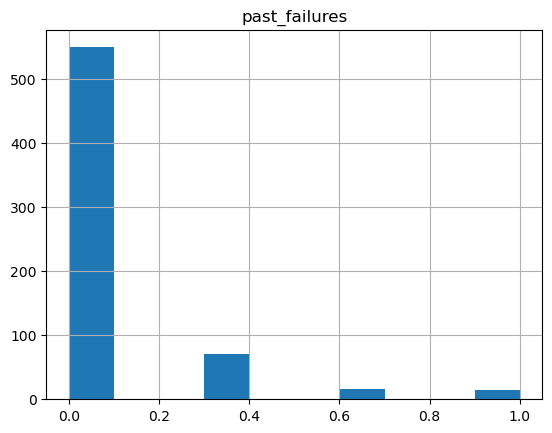

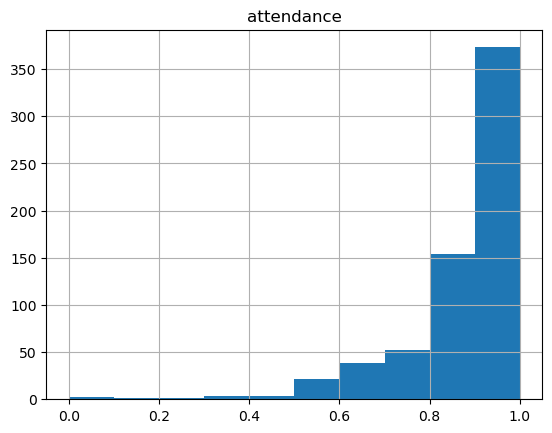

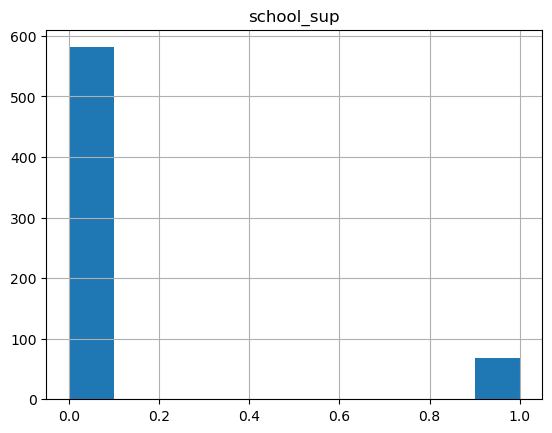

In [6]:
for name in df.columns:
    df.hist (column=name)
df['age'] = [el if el <= 25 else 2006 - el for el in age0]
max_age = max(df['age'])
df['age'] = df['age'] / max_age


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

<BarContainer object of 649 artists>

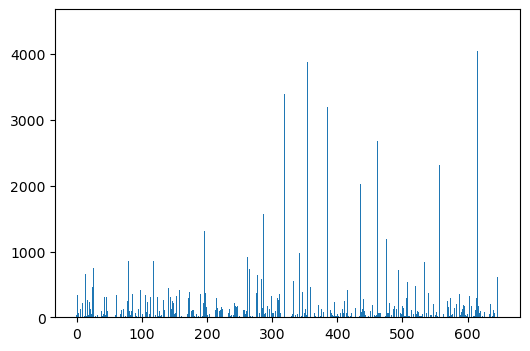

In [7]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
regression = linear_model.LinearRegression().fit(df, scores) #create model and train it

df1 = df.to_numpy()
scores1 = scores.to_numpy()
pred = [0] * len(df)

for i in range(len(df)):
    test = [i]
    X_test = df1[test]
    y_test = scores1[test]
    prediction = model.predict(X_test)[0][0] #calculate prediction for one object for vector x
    error = (prediction - y_test[0][0])**2 #simple error - square error
    pred[i] = error
 
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

x = [i for i in range(len(pred))]
y = pred
ax.bar(x, y)

In [8]:
del_index = []
for i in range(len(pred)):
    if pred[i] > 1500:
        del_index.append(i)
df = df.drop(del_index)
scores = scores.drop(del_index)

df.head(10)


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_sup
0,0.727273,1.00,1.00,0.25,0.50,1.0,0.8,0.8,0.2,0.4,1.0,1.0,1.0,0.0,1.0,1.0,1,0.000000,0.8125,0
1,0.772727,1.00,1.00,0.25,0.25,1.0,0.6,0.8,0.2,0.4,1.0,0.0,1.0,0.0,1.0,1.0,1,0.000000,0.9375,0
2,0.727273,0.25,0.25,0.50,0.25,0.8,1.0,1.0,0.4,0.8,1.0,1.0,0.0,1.0,1.0,1.0,1,0.000000,1.0000,0
3,0.818182,0.25,0.50,0.50,0.25,0.6,0.8,0.8,0.4,0.8,0.8,1.0,1.0,0.0,1.0,0.0,0,0.000000,0.6875,0
4,0.772727,0.50,0.25,0.50,0.50,0.8,0.4,1.0,0.2,0.4,1.0,0.0,0.0,0.0,1.0,1.0,1,0.000000,1.0000,0
5,0.772727,0.50,1.00,0.25,0.50,0.8,0.6,0.4,0.2,0.2,1.0,0.0,1.0,1.0,1.0,1.0,1,0.000000,0.7500,0
6,0.681818,0.25,0.25,0.75,0.50,0.8,0.4,0.2,0.2,0.4,0.4,0.0,0.0,0.0,1.0,1.0,1,0.000000,1.0000,0
7,0.681818,0.75,0.75,0.25,1.00,0.8,0.6,0.6,0.2,0.2,0.8,0.0,1.0,0.0,0.0,1.0,1,0.000000,0.6875,1
8,0.863636,0.25,0.25,0.75,0.25,0.8,0.8,0.8,0.6,0.6,1.0,1.0,0.0,0.0,1.0,1.0,1,0.333333,0.8750,0
9,0.772727,0.25,0.25,0.25,0.75,0.8,0.6,0.4,0.2,0.4,0.8,0.0,1.0,1.0,1.0,1.0,1,0.000000,0.6875,0


### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [9]:
kf = KFold(n_splits=4)

df1 = df.to_numpy()
scores1 = scores.to_numpy()

for train, test in kf.split(scores):
    X_train = df1[train]
    X_test = df1[test]
    y_train = scores1[train]
    y_test = scores1[test]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = 0
    for i in range(len(y_test)):
        rmse += (y_test[i] - y_pred[i]) * (y_test[i] - y_pred[i])
    rmse = sqrt(rmse / len(y_test))
    
    print(f"Точность модели: ", rmse)

Точность модели:  11.902842201093083
Точность модели:  12.35211108587657
Точность модели:  10.937393041133818
Точность модели:  11.577043727317486


### Вывод:

В процессе выполнения работы были применены следующие модификации данных: исправление ошибок в данных, замена пропусков средним значением по столбцу, нормализация данных, добавление новых признаков, исправление данных, введённых в другом формате, удаление выбросов.

Качество обучения модели улучшалось после добавления новых признаков и - значительнее - после удаления выбросов и исправления данных.